# Geospatial Analysis & Visualization with Python

## Lets Get Started!

### The first step with any python project is to import our packages

* We'll be working with three packages today: Panda, Geopandas, and Matplotlib
    * Pandas is general use package for working with tabular dataset
    * Geopandas is a geospatial exentson for Pandas
        * It to allow us to work with vector data (points, lines, & polgons)
    * Matplotlib is a powerful plotting library that can be used to make visualizations

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib notebook

### Now we can load the data

* We'll load the tabular data as a "DataFrame" using pandas
    * Then we'll converti it into a "GeoDataFrame" using Geopandas
        * To do this, we must assign the "geometry".  In this case its point data, and the coordinates are in lat/long
        * Then we need to assign a Coordiante Reference System (CRS) manually
            * ESPG is a standardized code that is used to represent CRSs.
            * 'espg:4326' is for the refers to the WGS 1984 datum, which our latitude/longitude data is based in.
                * This is a CRS that is widely used by many web-based platforms because like Google Maps and Mapbox
                * The original only had addresses, not coordinates, so we used a webservice (Mapbox) to generate the coordinates of our addresses
* Once we have the data loaded, calling .head() will give us a "preview" of our dataset

In [3]:
# We import the Police Killings file
police_Killings_Tabular = pd.read_csv('Data/PoliceKillings.csv',parse_dates=['date'])

# We can then convert teh pandas dataframe into a geopandas "GeodataFrame"
police_Killings = gpd.GeoDataFrame(police_Killings_Tabular,
    geometry=gpd.points_from_xy(police_Killings_Tabular.longitude, police_Killings_Tabular.latitude)
)

# Now we can assign a CRS
police_Killings.crs = {'init' :'epsg:4326'}

# Lets take a quick look.
police_Killings.head()

,date,id_incident,date.1,day_week,prov,city_town,postal_code,location_type,id_victim,Name,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,latitude,longitude,geocoding_Notes,geometry
0,2012-01-06,1,2012-01-06,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,...,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...,45.498173,-73.567157,NaN,POINT (-73.56716 45.49817)
1,2012-01-11,2,2012-01-11,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,...,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...,53.688760,-114.199440,NaN,POINT (-114.19944 53.68876)
2,2012-01-12,3,2012-01-12,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,...,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...,43.477098,-79.702193,NaN,POINT (-79.70219 43.47710)
3,2012-02-03,4,2012-02-03,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,...,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com...",43.687560,-79.321000,NaN,POINT (-79.32100 43.68756)
4,2012-02-13,5,2012-02-13,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,...,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an...",43.219570,-79.794930,NaN,POINT (-79.79493 43.21957)


# Before we dig into the data, lets make a quick map.

* We have a shapfile (denoted by the .shp) of the provinces in canada.
    * .shp is a standard format for vector data and Geopandas can read it as is


## Layers need to be in the same coordinate system to match up properly on a map!

* We can re-project the police_Killings layer using the .to_crs function to set the CRS to that of the Provinces
    * The provinces layer uses the Canada Lambert Conformal Conic projection (LCC).  This is the standard projection used by stats canada and is ideally suited for displaying the whole of country.
        
### Once both datasets are in the same coordinate system, we can make a map!
* First we must define a plot, using the matplotlib.pyplot package.  We imported this earlier as "plt"
    * We use the plt.subplots() to create a figure, and we can define how big we want it to be
* Geoapndas can then use the .plot() fucntion to create a map using matplotlib.
    * We simply tell it what axis to draw the plot on with ax="axes"
    * Then set a few other parameters:
        * We just want the provinces as a grey background so we can set the color
        * We want to classify killings by race, so we can set race as the column.  THen we can add a legend to aid interpretation of the data

<IPython.core.display.Javascript object>


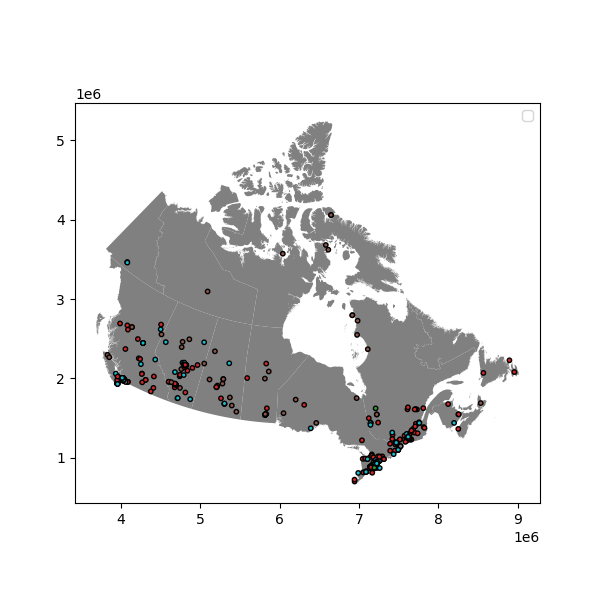

No handles with labels found to put in legend.


Legend


In [7]:
# We can import shapefiles directly using geopandas
Provinces = gpd.read_file('Data/lpr_000b16a_e.shp')

# We can use .to_crs() to create a police killings layer with the same projection as the provinces layer.
police_Killings_LCC = police_Killings.to_crs(Provinces.crs)

# Now, we can create a figure using matplotlib (plt), first we define the figure and the size
fig,axes=plt.subplots(
    figsize=(6,6)
)

# Now we can add the provinces using the .plot() function.  We set the plotting axes and give it a grey color
Provinces.plot(
    ax=axes,
    color='grey'
)

# Then we add the police_Killings_LCC.  We'll set the column to 'race', so we can disply by race,
# give the point markers a few more parameters, and add them to a legend
police_Killings_LCC.plot(
    ax=axes,
    column='race',
    edgecolor='k',
    markersize=10,
    legend=True,
    legend_kwds={'loc': 'upper right','fontsize':10}
)
# lgnd = axes.legend()
# print(lgnd)
# lgnd.legendHandles[0]._legmarker.set_markersize(6)
# lgnd.legendHandles[1]._legmarker.set_markersize(6)

## And now you've made your first map with python!

* But notice, it doesn't look great.  This is just the quick and dirty way to look ata data

* To make things more presentable, we'll have to be more explicity in our definitions.  But that's a task for later.

* For now, lets move on and look at the dataset in more detail.

# Lets explore this dataset a bit further

## This dataset has information on many aspects of the incident.  The aspects we'll investigate today include: age, gender race, armed_type, mentral_distress_disorder.
* Pandas & Geopandas have some nice features to quickly summarize our dataset.
* We can use .count() to get the total # incidents.
    * Callling .count() as is, will give us a list of all the columns, and a count for each.  We can see most collumns are "full" but in the "geocoding_Notes" column, we can see that 4 points don't have coordinates associated with their address.  This suggests there was an error in the data entry process.  We don't need to worry about this though.
* We can use the .mean(), .min(), etc. followed by ['age'] to get some vital statistics on the age of victims.
    

In [10]:
# import numpy as np
print(police_Killings.count())
print()
print()
print('Mean Age of Victim: \n',
      police_Killings.mean()['age'])
print()
print('Standard Deviation of Age of Victim: \n',
      police_Killings.std()['age'])
print()
print('Youngest Victim: \n',
      police_Killings.max()['age'])
print()
print('Oldest Victim: \n',
      police_Killings.min()['age'])

date                             462
id_incident                      462
date.1                           462
day_week                         462
prov                             462
city_town                        462
postal_code                      462
location_type                    462
id_victim                        462
Name                             462
age                              455
gender                           462
race                             462
ethnic_ancestry                  107
immigrant_refugee_naturalized    462
armed_type                       462
cause_death                      462
taser_deployed                   462
injured_officer                  462
excited_delirium                 462
mentral_distress_disorder        462
substance_abuse                  462
summary                          462
latitude                         458
longitude                        458
geocoding_Notes                    4
geometry                         462
d

### Lets say we want to ask a more detailed question.  Like the breakdown of armed_type by mental_health_disorder:
* We can use .groupby() to aggregate data by one or more categories.  After the groupby, we dictate "How" to aggregate.  Whether we want a count, a mean, etc.
    * Calling date allows us to print just one collumn so its less confusing to look at just one column and .sort_values() allows us to arange hte data so its easier to interpret

In [10]:
print(police_Killings.groupby(['armed_type']).count()['date'].sort_values())
print()
print(police_Killings.groupby(['gender','mentral_distress_disorder']).count()['date'])

armed_type
Other weapons                             12
Bat, club, other swinging object          20
Unknown                                   23
Vehicle                                   23
Air gun, replica gun                      27
Firearm                                   88
None                                     116
Knife, axe, other cutting instruments    153
Name: date, dtype: int64

gender  mentral_distress_disorder
Female  No                             1
        Unknown                        7
        Yes                            6
Male    No                            34
        Unknown                      227
        Yes                          187
Name: date, dtype: int64


# The statistics we're most interested in is the racial breakdown, but unlike gender, the racial demographics of Canada aren't evenly split.  They also varry widely by province.

## We also want to know the provincial breakdown, but again, the population distribution isn't even 


In [14]:
print(police_Killings.groupby('race').count()['date'].sort_values(ascending=False)/police_Killings.count()['date'])
print()
print(police_Killings.groupby('prov').count()['date'].sort_values(ascending=False))

race
Caucasian         0.458874
Unknown           0.214286
Indigenous        0.151515
Black             0.093074
Asian             0.032468
South Asian       0.021645
Other             0.010823
Arab              0.010823
Latin American    0.006494
Name: date, dtype: float64

prov
ON    152
BC     98
QC     87
AB     71
MB     19
SK     17
NU      5
NB      4
NS      3
NL      3
YT      2
NT      1
Name: date, dtype: int64


# White people are make up the "majority" of police killings.  They're 75% of the population, but are only 45% of the police killings.  Indigenous and Black people are x & y % of the population respectively.

# Also, obvioulsly, there are more killings where there are more people.

### But does that tell the whole story?  No!

* Ontariao is the most populous province (14.5 million), and it has the most
* Quebec is the second most populous (8.5 million), yet BC (5 million) has more killings!?

# To really know what's going on, we need to Normalize our data

* Lets import a tabular dataset of provincial level census information
* We have the total population, and the racial breakdown.

In [17]:
Census = pd.read_csv('Data/Census.csv',index_col=[0])
Census.head()

,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,
1,35151728,1924635,1577060,1198545,780125,447320,523235,313260,264305,188710,92920,132090,232375,1673780,2952075,25803368
10,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,4180,462186
11,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,3705,133527
12,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,15475,813453
13,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,9045,693186


## Stats Canada's racial demographic data doesn't perfectly match our police violence data

* But we do have black, white, and indigenous.  So we'll focus on these groups.
* Exploring the other races on your own time could be a good way to get some practice.


## We can join this data set to the provincial shapefile!

* PRUID is a "unique identifier" that represents the provinces.  We can use it as the join key.

In [18]:
Test_Join = Provinces.set_index('PRUID').join(Census)
Test_Join.head()

,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,Total,...,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# But our join fails!

### Why?  Lets look at the join keys from both files?  Maybe we have a datatype missmatch?

In [19]:
print(Provinces['PRUID'])
print(Census.index)


0     10
1     11
2     12
3     13
4     24
5     35
6     46
7     47
8     48
9     59
10    60
11    61
12    62
Name: PRUID, dtype: object
Int64Index([1, 10, 11, 12, 13, 24, 35, 46, 47, 48, 59, 60, 61, 62], dtype='int64', name='PRUID')


## Sure enough!  The provinces PRUID is an "object", not an integer.

* We can fix that easily and then do the join!
    * Just type 'int64' in .astype() so it matches with the other layer!

In [20]:
Provinces['PRUID'] = Provinces['PRUID'].astype('int64')
Provinces_Join = Provinces.set_index('PRUID').join(Census)
Provinces_Join.head()

,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,Total,...,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",519716,...,1375,335,220,75,60,145,255,45725,4180,462186
11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",142907,...,585,145,215,210,110,50,85,2735,3705,133527
12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",923598,...,8115,1195,1540,1540,695,635,1390,51490,15475,813453
13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",747101,...,2960,1230,735,1685,230,300,680,29380,9045,693186
24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",8164361,...,213740,62825,32405,8055,4575,9840,23040,182890,209870,6949091


## Now we  want to normalize the number of killings by population to get a rate

* We have a few more steps to go through first.
    * The police killings and census data use different abbreviations.  To do a join our dataset with the census data we'll need to assign an new abbreviaton
    * We'll us a dictionary to do this
* Then we can summarize the killings by province and join it to the Provinces_Join layer

## Now we can summarize the killings by province and join it to the Provinces_Join layer
* Note Prince Edward Island doesn't have any.

In [21]:
# Joined = Canada.join(police_Killings)

abr_dict = {'Alta.':'AB',
            'B.C.':'BC', 
            'Man.':'MB', 
            'N.B.':'NB', 
            'N.L.':'NL', 
            'N.S.':'NS',
            'N.W.T.':'NT',
            'Nvt.':'NU', 
            'Ont.':'ON', 
            'P.E.I.':'PE',
            'Que.':'QC', 
            'Sask.':'SK',
            'Y.T.':'YT'
           }
# police_Killings=police_Killings.loc[police_Killings['race']!= 'Unknown']
Provinces_Join['prov']=''
for prov in Provinces_Join['PREABBR'].unique():
    Provinces_Join.loc[Provinces_Join['PREABBR']==prov,'prov']=abr_dict[prov]
# print(Provinces_Join[['Caucasian','Indigenous','Black','South Asian','Asian']].sum()/Provinces_Join['Total'].sum()*police_Killings['race'].count())
print(Census.loc[Census.index==1,['Caucasian','Indigenous','Black']]/Census.loc[Census.index==1,'Total'].values[0])
# print(police_Killings.groupby('race').count()['date'])

print(police_Killings.loc[police_Killings['race']=='Unknown'].groupby('prov')['date'].count())
# print(police_Killings.groupby('race').count())

Provinces_Killings=Provinces_Join.set_index('prov').join(police_Killings.groupby('prov').count()['id_victim'])
# Provinces_Killings['id_victim']

       Caucasian  Indigenous     Black
PRUID                                 
1       0.734057    0.047616  0.034096
prov
AB    22
BC    25
NB     1
ON    33
QC    15
SK     2
YT     1
Name: date, dtype: int64


### We can fix this easily using the .fillna() function

### The we can do the normalization!!

* We'll calculat the rate of police killings per ... ten thousand?
    * Divide the number of killings, by the total population.  To get the per person rate
    * Then multiply by 1 million
    * Then sort the values
    
* Then we'll plot it on a map, with a bar graph below for extra context!

In [18]:
Provinces_Killings['Victims'] = Provinces_Killings['id_victim'].fillna(0)
Provinces_Killings['Rate'] = Provinces_Killings['Victims']/Provinces_Killings['Total']*1e4
Provinces_Killings = Provinces_Killings.sort_values(by='Rate')
print(Provinces_Killings)

                         PRNAME                    PRENAME  \
prov                                                         
PE         Prince Edward Island       Prince Edward Island   
NS                  Nova Scotia                Nova Scotia   
NB                 New Brunswic              New Brunswick   
NL    Newfoundland and Labrador  Newfoundland and Labrador   
QC                       Quebec                     Quebec   
ON                      Ontario                    Ontario   
MB                     Manitoba                   Manitoba   
SK                 Saskatchewan               Saskatchewan   
AB                      Alberta                    Alberta   
BC             British Columbia           British Columbia   
NT        Northwest Territories      Northwest Territories   
YT                        Yukon                      Yukon   
NU                      Nunavut                    Nunavut   

                        PRFNAME PREABBR   PRFABBR   AREA_LCC    AREA_

# Okay, now we're ready to normalize

In [ ]:
# Provinces_Killings['East Asian']=Provinces_Killings['Asian']
police_Killings.loc[police_Killings['race']=='East Asian','race']='Asian'
Total = police_Killings.groupby('race').count()
# print(policde_killings)
print(Total['date'].T)
Rate = []


# Races = ['Black','Indigenous','Caucasian','East Asian','South Asian']

Races = ['Asian','South Asian','Caucasian','Black','Indigenous']
for race in Races:
    Rate.append((Total['date'].T[race]/Provinces_Killings[race].sum())*1e6/17)
#     print(Total['date'].T[race])#,Provinces_Killings[race])
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
fig,ax=plt.subplots(figsize = (8,8))
ax.barh(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k',color=[1,.2,.25],linewidth = 1)
ax.set_title("Police Killing Rates by Race in Canada (2000-2017)",fontsize = 16)
ax.set_xlabel('Victims per Year per Million Residents',fontsize=12)
ax.grid(axis='x',color='grey')
ax.set_axisbelow(True)
textstr = '$\\bf{Data Sources}$\nDempgraphics:  Stats Canada\nPolice Killings:    Jacques Marcoux &\n'+\
'                          Katie Nicholson (CBC)'
props = dict(facecolor='white')#, alpha=0.75)
ax.text(0.46, 0.16, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.savefig('Rates.png',dpi=400)
# print(Provinces_Killings[['Black','Indigenous','Caucasian','East Asian','South Asian','Arab','West Asian','Mixed']].sum().sort_values()/1e6)

In [ ]:

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:3, :3])
ax2 = fig.add_subplot(gs[0:3, 3:])
ax3 = fig.add_subplot(gs[3:, :3])
ax4 = fig.add_subplot(gs[3:, 3:])
Provinces_Killings['Indigenous_pct'] = Provinces_Killings['Indigenous']/Provinces_Killings['Total']
Provinces_Killings['Black_pct'] = Provinces_Killings['Black']/Provinces_Killings['Total']

Provinces_Killings.plot(ax=ax1,column='Rate',edgecolor='k',legend=True,scheme='natural_breaks')
# ax3.bar(Provinces_Killings.index,Provinces_Killings['Rate'])
# ax3.set_xticklabels(Provinces_Killings.index,rotation=30)
Total = police_Killings.groupby('race').count()
Rate = []
Races = ['Black','Indigenous','Caucasian','Asian','South Asian']
for race in Races:
    Rate.append((Total['date'].T[race]/Provinces_Killings[race]).values[0]*1e6/17)
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
ax4.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
ax4.set_title('Police Killing Rates in Canada')
ax4.set_ylabel('Killings/Year/Million Residents')
Provinces_Killings.plot(ax=ax3,column='Indigenous_pct',edgecolor='k',legend=True,scheme='natural_breaks')
Provinces_Killings.plot(ax=ax2,column='Black_pct',edgecolor='k',legend=True,scheme='natural_breaks')
plt.suptitle('Police Killing Rates Across Canada')

### Nunavut obviously has a serious problem.  75% of its population is Inuit & its rate is an order of magnitude higher than the other provinces or teritories.

### BC is the worst to of the provinces.  Lets select BC and investigate further.

* For We can select BC using the PREABBR value.
* We'll also re-project into UTM Zone 10 N, this is a more accurate coordinate system for this region

* Then we can look at the racial breakdown of killings in BC using the .groupby function again.
    * We'll create a new dataframe normalizing total killings for different races by total population within those groups
    * Then we can make a barplot highlighting racial biases 


In [ ]:
# 26910
BC = Provinces_Killings.loc[Provinces_Killings.index=='B.C.'].to_crs(26910)
BC_Killings = police_Killings.loc[police_Killings['PREABBR']=='B.C.'].to_crs(26910)
Total_BC = BC_Killings.groupby('race').count()

Rate = []
Races = ['Black','Indigenous','Caucasian','Asian','South Asian']
for race in Races:
    Rate.append((Total_BC['date'].T[race]/BC[race]).values[0]*1e6/17)
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
plt.figure()
plt.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
plt.title('Police Killing Rates in BC')
plt.ylabel('Killings/Year/Million Residents')
plt.savefig('BCPoliceKillings.png')
# print(Total_BC['Black']/BC['Black'])

# fig,ax=plt.subplots(figsize=(6,6))

# BC.plot(ax=ax,color='grey',edgecolor='k')
# BC_Killings.plot(ax=ax,column='race',legend=True)
# print(Canada.head())

# from fiona.crs import from_epsg
# from_epsg(2193)
# # Proj({'init': 'epsg:2193', 'no_defs': True}, preserve_flags=True)

## Lets make an infographic for BC, summarizing some of the key points

In [ ]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(10,10)
ax0 = fig.add_subplot(gs[0:6, 0:6])
BC.plot(ax=ax0,color='grey',edgecolor='k')
BC_Killings.plot(ax=ax0,column='race',legend=True,edgecolor='k')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.set_title('Police Killings in BC 2000-2017')


ax1 = fig.add_subplot(gs[1:5, 6:])

Mental_Health = BC_Killings.groupby('mentral_distress_disorder').count()
ax1.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax1.set_title('Was it a Mental Health Crisis?')
# ax1.bar(BC_Year.index,BC_Year.race,width=300,edgecolor='k')
# ax1.set_title('Police Killings by Year in BC')
# ax1.set_ylabel('Number')

ax2 = fig.add_subplot(gs[6:, 0:6])
ax2.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
ax2.set_title('Police Killing Rates by Race in BC')
ax2.set_ylabel('Killings/Year/Million Residents')
ax2.set_xticklabels(Normalized_Rates.index,rotation=30)

BC_Killings.loc[BC_Killings.armed_type=='Knife, axe, other cutting instruments','armed_type']='Knife/Axe'
BC_Killings.loc[BC_Killings.armed_type=='Bat, club, other swinging object','armed_type']='Bat/Club'
BC_Killings.loc[BC_Killings.armed_type=='Air gun, replica gun','armed_type']='Fake Gun'
BC_Killings.loc[BC_Killings.armed_type=='Unknown','armed_type']='None'
Mental_Health = BC_Killings.groupby('armed_type').count()
ax3 = fig.add_subplot(gs[6:, 6:])
ax3.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax3.set_title('Were They Armed?')


plt.tight_layout()
# ax0 = fig.add_subplot(gs[0:6, 0:6])